# Question 2

In [129]:
install.packages("gplots")

Installation du package dans 'C:/Users/David/AppData/Roaming/SPB_Data/R/win-library/4.1'
(car 'lib' n'est pas spécifié)

installation des dépendances 'gtools', 'caTools'




package 'gtools' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\David\AppData\Local\Temp\RtmpovhP9W\downloaded_packages


In [131]:
#imports
library(readr)
suppressMessages(library(tigerstats))
suppressMessages(library(ggplot2))
suppressMessages(library(gridExtra))
suppressMessages(library("DESeq2"))
suppressMessages(library("vsn"))
suppressMessages(library("pheatmap"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library(repr))
suppressMessages(library(RColorBrewer))
suppressMessages(library(gplots))

In [6]:
#load data
cd <- suppressMessages(read_tsv("clinical-data.tsv"))
mc <- suppressMessages(read_tsv("morphological-counts.tsv"))

In [7]:
new_cohort <- replace(cd$COHORT, cd$COHORT=='Organ Donor (OPO)', 'Organ_Donor')
cd$COHORT <- new_cohort

In [8]:
cd

SMPLID,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,COHORT,TRISCHD,DTHHRDY,SUBJID,IMGURL
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
GTEX-11EM3-0126,2,21,59,110.00,22.21,"2 pieces, small attachment of fibrofatty tissue",Organ_Donor,18,0,GTEX.11EM3,https://brd.nci.nih.gov/brd/specimen/GTEX-11EM3-0126
GTEX-11EQ9-0626,1,33,68,166.00,25.24,"2 pieces, focal lyphocytic thyroiditis, delineated, adherent fibrous/adipose tissue ~1mm",Organ_Donor,15,2,GTEX.11EQ9,https://brd.nci.nih.gov/brd/specimen/GTEX-11EQ9-0626
GTEX-11LCK-0526,1,38,71,239.00,33.33,"2 pieces, regressive areas, adherent fat/fibrous tags, delineated",Organ_Donor,166,0,GTEX.11LCK,https://brd.nci.nih.gov/brd/specimen/GTEX-11LCK-0526
GTEX-11NSD-0126,1,27,68,184.60,28.07,"2 pieces, ~2mm colloid cyst, featurs of goiter, regressive changes",Organ_Donor,36,0,GTEX.11NSD,https://brd.nci.nih.gov/brd/specimen/GTEX-11NSD-0126
GTEX-11O72-2326,1,48,72,220.00,29.83,2 pieces,Postmortem,919,2,GTEX.11O72,https://brd.nci.nih.gov/brd/specimen/GTEX-11O72-2326
GTEX-11P7K-0226,1,37,73,159.00,20.98,2 pieces; well dissected,Organ_Donor,29,0,GTEX.11P7K,https://brd.nci.nih.gov/brd/specimen/GTEX-11P7K-0226
GTEX-11P81-0126,2,31,65,185.50,30.87,"2 pieces, one is ~50% skeletal muscle, fat and fibrous tissue",Organ_Donor,230,0,GTEX.11P81,https://brd.nci.nih.gov/brd/specimen/GTEX-11P81-0126
GTEX-11P82-0226,1,21,70,167.00,23.96,2 pieces; incidental 3.5mm perithyroidal lymph node encircled; 2.5mm nubbin of attached fat delineated; thyroid unremarkable,Organ_Donor,91,1,GTEX.11P82,https://brd.nci.nih.gov/brd/specimen/GTEX-11P82-0226
GTEX-11TT1-1126,1,22,72,171.90,23.31,"2 pieces, focus of solid cell nests",Organ_Donor,22,0,GTEX.11TT1,https://brd.nci.nih.gov/brd/specimen/GTEX-11TT1-1126


In [5]:
mc

SMPLID,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,...,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTEX-11EM3-0126,20,22,107,74,49,589,466,88,49,...,99,41,150,18,2,2,193,44,66,24
GTEX-11EQ9-0626,51,81,87,87,64,377,256,74,33,...,223,58,55,25,5,0,127,25,17,42
GTEX-11LCK-0526,79,86,51,87,16,169,310,153,97,...,316,166,74,31,71,36,99,173,173,15
GTEX-11NSD-0126,45,140,34,51,29,455,281,43,60,...,66,31,25,36,8,78,88,40,73,34
GTEX-11O72-2326,171,139,44,133,95,61,260,12,16,...,28,120,62,340,41,16,31,18,62,643
GTEX-11P7K-0226,159,65,31,53,12,491,674,18,122,...,6,139,17,37,28,78,91,79,387,76
GTEX-11P81-0126,86,189,40,52,10,53,141,27,24,...,55,103,28,38,50,0,15,29,25,62
GTEX-11P82-0226,71,122,13,7,12,303,285,6,86,...,52,102,21,18,65,31,78,342,302,26
GTEX-11TT1-1126,30,100,323,48,146,724,114,14,263,...,140,115,113,65,1,0,208,25,28,23


In [9]:
#normalisation pour les variables numériques et changement de type pour les variable catégorielles 
numerical_variables <- list('AGE', 'HGHT', 'WGHT', 'BMI', 'TRISCHD') 
categorical_variables <- list('SEX', 'COHORT', 'DTHHRDY')
for (variable in numerical_variables){
    cd[variable] <- scale(cd[variable])
}
for (variable in categorical_variables){
    cd[variable] <- factor(cd[[variable]])
}

In [10]:
#On retire la colonne SMPLID, on garde les cluster 0 à 63 (indices 2 à 65)²
mc_red <-mc[,2:65]

In [ ]:
mc_red

## Pré-analyses

### Corrélation moyenne-variance

In [ ]:
#Dans l'article sur DESseq2 ils parlent du fait qu'avec les rna counts on a une corrélation entre la moyenne de l'expression
#d'un gêne et sa variance, et du coup il vaut mieux faire une normalisation, par exemple pour les pca etc. du coup je voulais
#vérifier si c'est le cas aussi avec les cluster counts mais il semble que non
#après, ça ne veut pas nécessairement dire qu'il ne faut pas quand même faire de normalisation 

means <- colMeans(mc_red)
sdev <- sapply(mc_red, sd)

plot(means, sdev)
cor(means, sdev)

In [ ]:
meanSdPlot(t(data.matrix(mc_red)), ranks=FALSE)

In [ ]:
#par comparaison, faisons la même chose avec les rna counts
rna =  read_tsv("RNA-read-counts.tsv")
rna
meanSdPlot(t(data.matrix(rna)), ranks=FALSE)

In [ ]:
mrna <- rna[,3:65] #On retire la colonne name et description (indices 1 et 2)
means <- colMeans(mrna)
sdev <- sapply(mrna, sd)

plot(means, sdev)
cor(means, sdev)

#on voit que la corrélation est beaucoup plus élevée

## Analyse de l'expression différentielle

In [81]:
#assoc_table va être une matrice dont les lignes correspondent aux variables cliniques et les colonnes aux clusters
#les éléments de la matrice décrivent l'association entre les variables et les clusters
#on extrait les noms des variables cliniques et des clusters pour les définir comme noms des lignes et colonnes d'assoc_table
row <- colnames(cd)[2:10]
row <- row[-6]

col <- colnames(mc[,2:65])
assoc_table <- data.frame(matrix(ncol = 64, nrow = 8))
colnames(assoc_table) <- col
rownames(assoc_table) <- row
#Tous les éléments d'assoc_table sont FALSE et vont être changés en True au fur et à mesure que les associations sont déterminées
assoc_table[,] <- 0
assoc_table

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,...,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HGHT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WGHT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BMI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COHORT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRISCHD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTHHRDY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sex

In [82]:
#création de l'objet deseq dataset
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ SEX)
# calcul des expressions différentielles
dds <- DESeq(dds, quiet=TRUE)
res <- results(dds)
#sélection des clusters pour lesquels les p values et les pvalues ajustées sont inférieures à 0.05
res.05 <- results(dds, alpha = 0.05)
resSig <- subset(res, padj < 0.05)
resSig
#on remplit la colonne SEX dans assoc_table
#assoc_table["SEX",] <- colnames(assoc_table) %in% rownames(resSig)

converting counts to integer mode



log2 fold change (MLE): SEX 2 vs 1 
Wald test p-value: SEX 2 vs 1 
DataFrame with 7 rows and 6 columns
                         baseMean log2FoldChange     lfcSE      stat
                        <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.18   79.0266       1.053218  0.268311   3.92536
Mophological.cluster.28  154.2311       0.611144  0.215170   2.84029
Mophological.cluster.29   71.3152       0.672496  0.225778   2.97857
Mophological.cluster.36  116.7020       2.803487  0.460505   6.08786
Mophological.cluster.38   92.7315       1.073725  0.294151   3.65026
Mophological.cluster.42  108.5923       1.816409  0.393394   4.61728
Mophological.cluster.57  114.7111       0.944129  0.282605   3.34081
                             pvalue        padj
                          <numeric>   <numeric>
Mophological.cluster.18 8.65987e-05 1.81857e-03
Mophological.cluster.28 4.50729e-03 4.05656e-02
Mophological.cluster.29 2.89601e-03 3.04081e-02
Mophological.cluster.36 1.14432e-09 

In [83]:
fill_assoc_table <- function(resSig, cond){
    names = rownames(resSig)
    lfc = resSig$log2FoldChange
    for(i in 1:length(names)){
        name = names[i]
        #print(name)
        assoc_table[cond,][name] <<- lfc[i]
        }        
    }


### Hardy

In [14]:
#Il a ete choisi de rassembler les categories de l'echelle de Hardy en 2 categories : 1 correspond aux morts rapides (1 et 2) et 0 aux morts plus lentes (0,3 et 4)
levels(cd$DTHHRDY)[levels(cd$DTHHRDY)=="2"] <-"1"
levels(cd$DTHHRDY)[levels(cd$DTHHRDY)=="3"] <-"0"
levels(cd$DTHHRDY)[levels(cd$DTHHRDY)=="4"] <-"0"

In [84]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ DTHHRDY)
dds <- DESeq(dds, quiet=TRUE)
res <- results(dds)
res.05 <- results(dds, alpha = 0.05)
#table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
#resSig[ order(resSig$log2FoldChange), ]
fill_assoc_table(resSig, "DTHHRDY")
#print(assoc_table['DTHHRDY',])

converting counts to integer mode



### Cohort

In [85]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~ COHORT)
dds <- DESeq(dds, quiet=TRUE)
res <- results(dds)
res.05 <- results(dds, alpha = 0.05)
#table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
#resSig[ order(resSig$log2FoldChange), ]
fill_assoc_table(resSig, "COHORT")
#print(assoc_table['COHORT',])

converting counts to integer mode



### Numerical variables

In [69]:
#fonction pour remplir la ligne du tableau 'assoc_table' associée avec une variable clinique numérique, dont le nom est donné dans l'argument "condition"
num_dif_exp <- function(condition, assoc_table){
    cond <- as.formula(paste("~", condition))
    print(cond)
    dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = cond)
    dds <- DESeq(dds, quiet=TRUE)
    res <- results(dds)
    res.05 <- results(dds, alpha = 0.05)
    resSig <- subset(res, padj < 0.05)
    #print(rownames(resSig))
    fill_assoc_table(resSig, condition)
}

In [86]:
for(variable in numerical_variables){
    num_dif_exp(variable, assoc_table)}

~AGE
<environment: 0x000000004a5e61f8>


converting counts to integer mode



~HGHT
<environment: 0x000000001010b200>


converting counts to integer mode



~WGHT
<environment: 0x000000005498adb0>


converting counts to integer mode



~BMI
<environment: 0x0000000052801458>


converting counts to integer mode



~TRISCHD
<environment: 0x000000003c613630>


converting counts to integer mode



### Representation d'assoc_table sous forme de heatmap

Warning message in heatmap.2(data.matrix(assoc_table), Colv = NA, Rowv = NA, scale = "none", :
"Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram."
Warning message in heatmap.2(data.matrix(assoc_table), Colv = NA, Rowv = NA, scale = "none", :
"Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram."


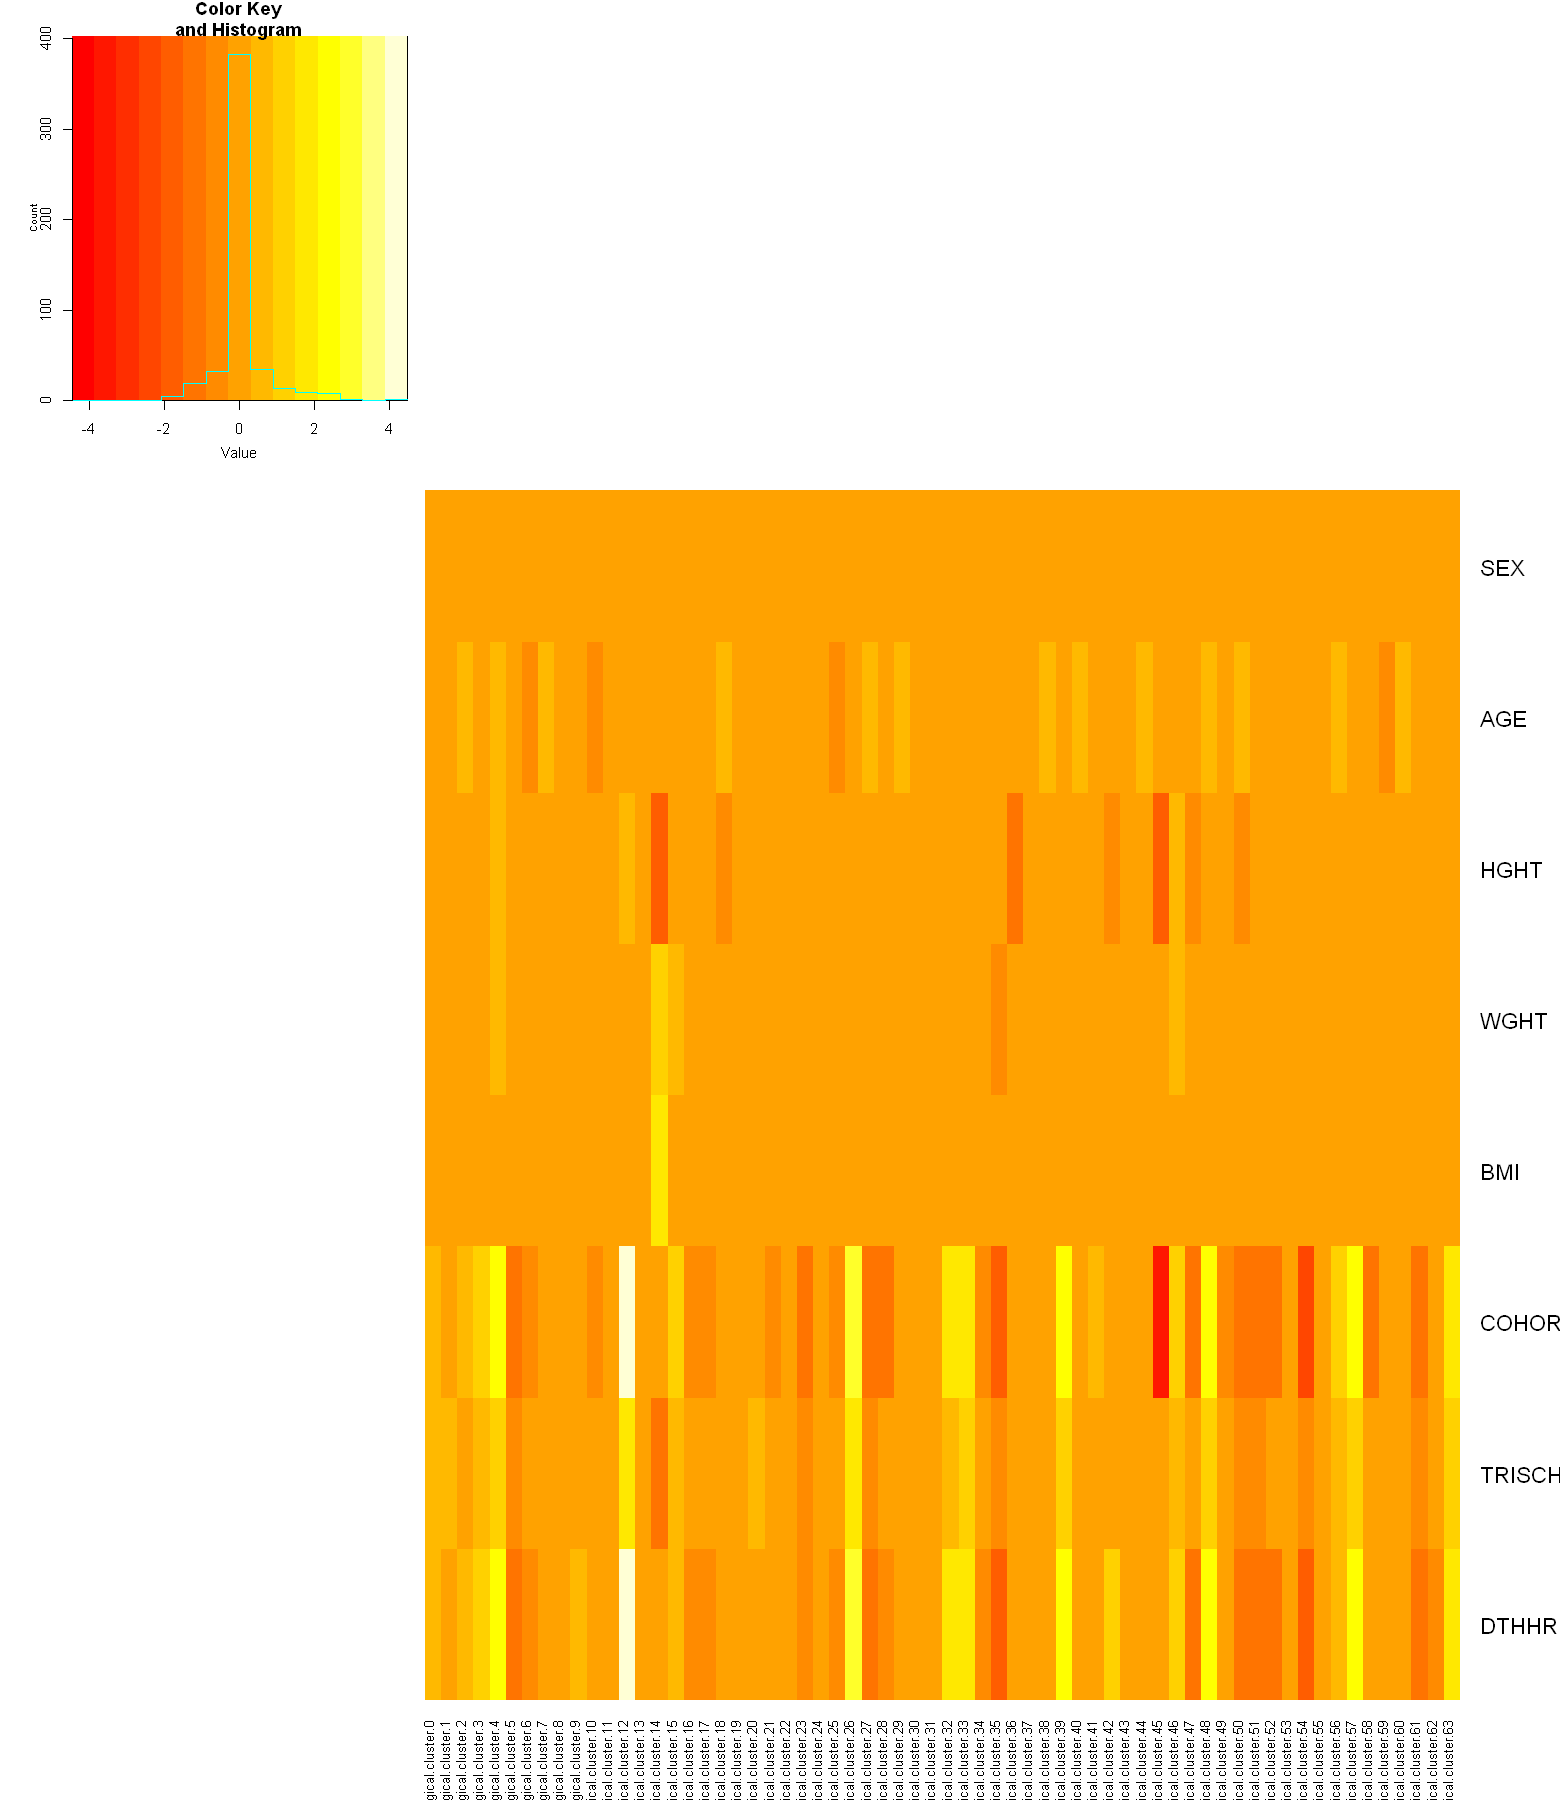

In [133]:
options(repr.plot.width=13, repr.plot.height=15)
#jpeg(file="heatmap1.jpeg")
heatmap.2(data.matrix(assoc_table), Colv = NA, Rowv = NA, scale='none', trace="none")
#dev.off()

ERROR while rich displaying an object: Error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (8): y

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_te

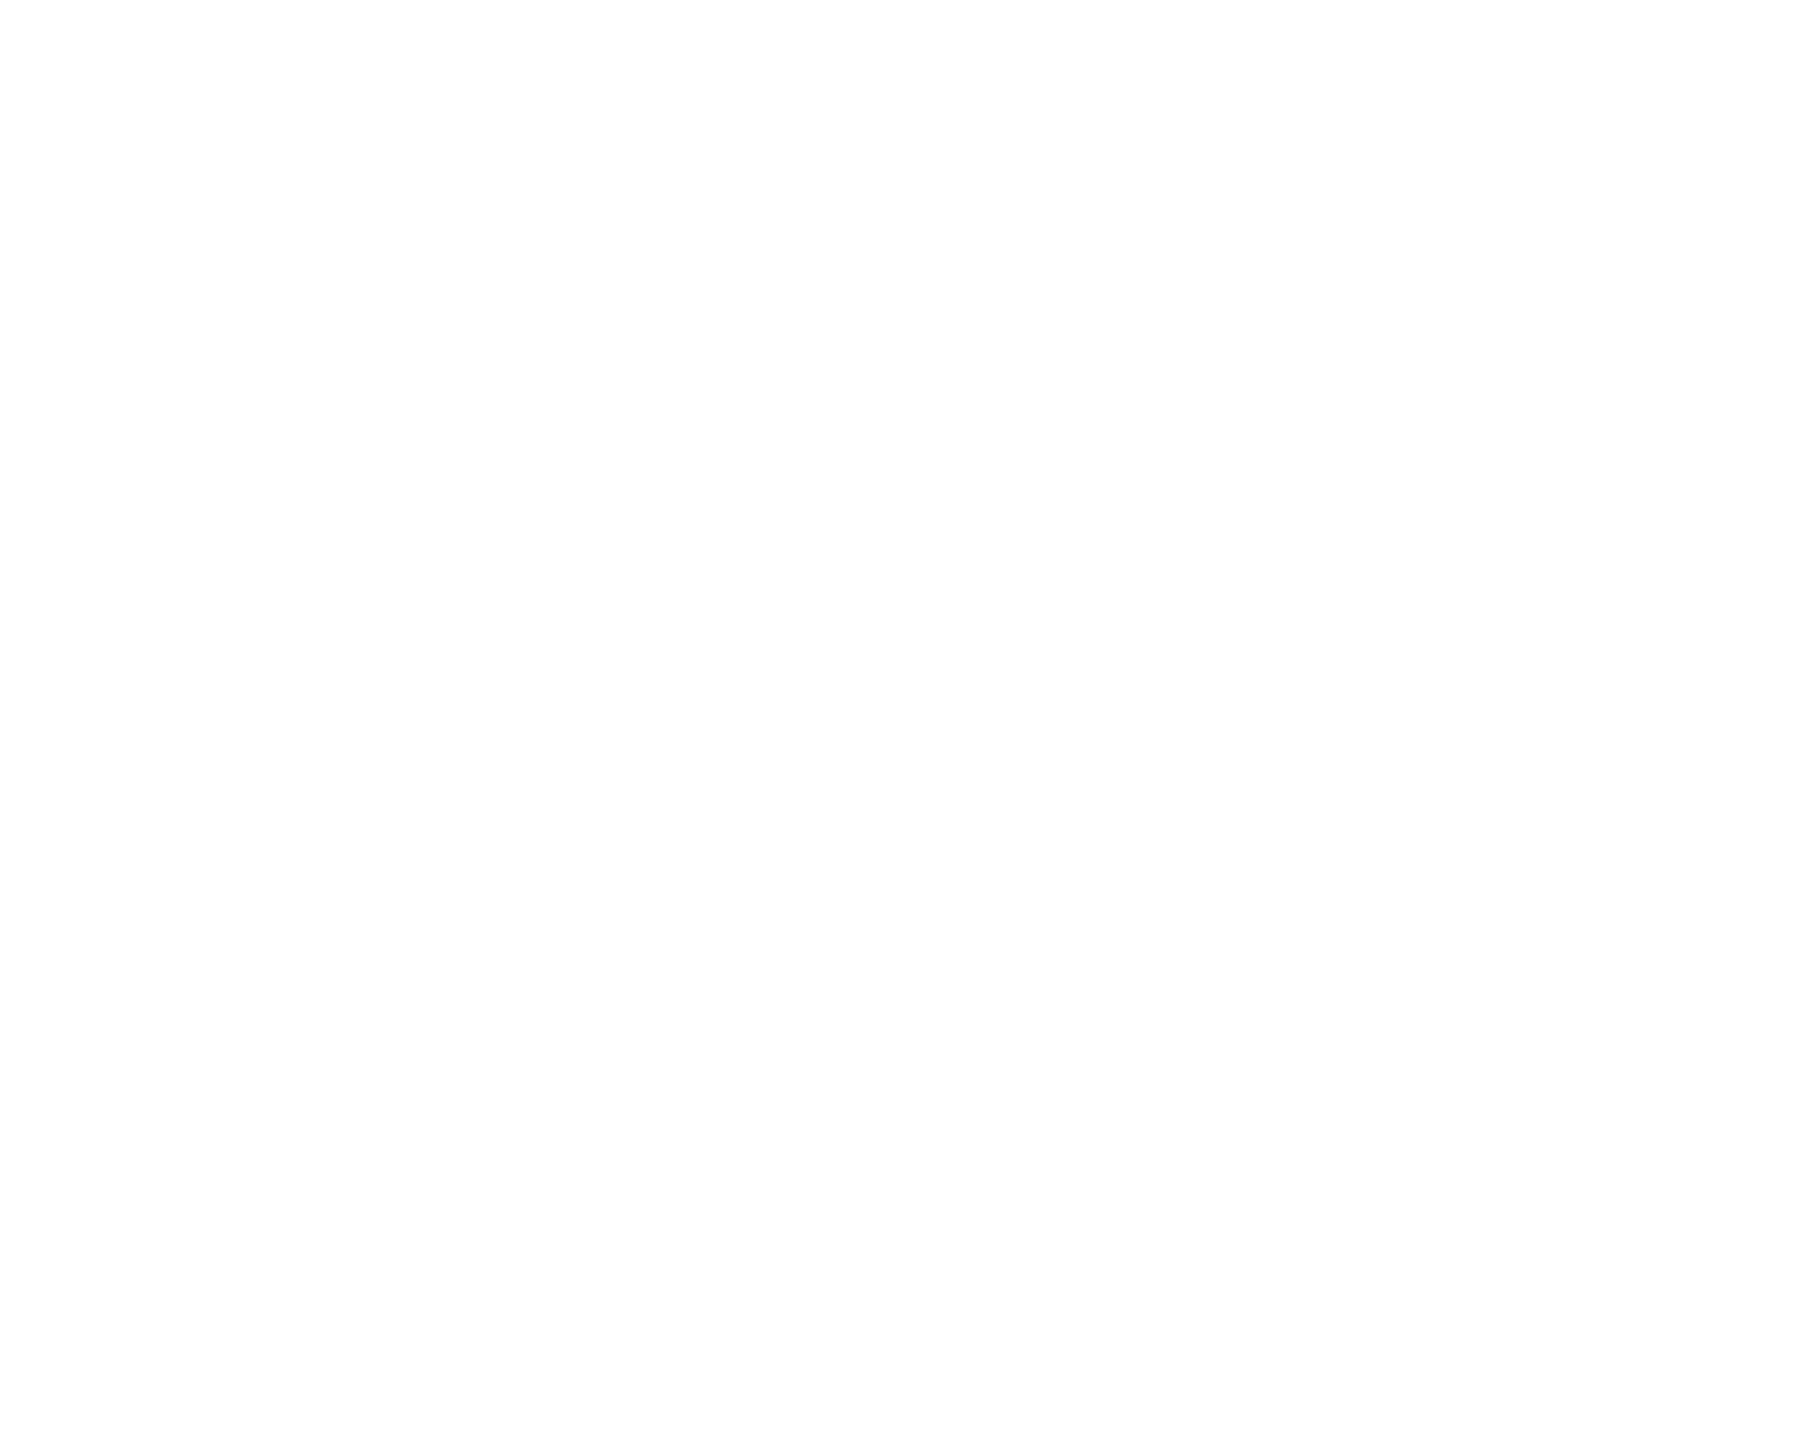

In [101]:
ggplot(assoc_table, aes(rownames(assoc_table), colnames(assoc_table))) + geom_tile()

In [102]:
colnames(assoc_table)

[1] "Mophological.cluster.0"  "Mophological.cluster.1" 
 [3] "Mophological.cluster.2"  "Mophological.cluster.3" 
 [5] "Mophological.cluster.4"  "Mophological.cluster.5" 
 [7] "Mophological.cluster.6"  "Mophological.cluster.7" 
 [9] "Mophological.cluster.8"  "Mophological.cluster.9" 
[11] "Mophological.cluster.10" "Mophological.cluster.11"
[13] "Mophological.cluster.12" "Mophological.cluster.13"
[15] "Mophological.cluster.14" "Mophological.cluster.15"
[17] "Mophological.cluster.16" "Mophological.cluster.17"
[19] "Mophological.cluster.18" "Mophological.cluster.19"
[21] "Mophological.cluster.20" "Mophological.cluster.21"
[23] "Mophological.cluster.22" "Mophological.cluster.23"
[25] "Mophological.cluster.24" "Mophological.cluster.25"
[27] "Mophological.cluster.26" "Mophological.cluster.27"
[29] "Mophological.cluster.28" "Mophological.cluster.29"
[31] "Mophological.cluster.30" "Mophological.cluster.31"
[33] "Mophological.cluster.32" "Mophological.cluster.33"
[35] "Mophological.cluster.34" "Mophological.cluster.35"
[37] "Mophological.cluster.36" "Mophological.cluster.37"
[39] "Mophological.cluster.38" "Mophological.cluster.39"
[41] "Mophological.cluster.40" "Mophological.cluster.41"
[43] "Mophological.cluster.42" "Mophological.cluster.43"
[45] "Mophological.cluster.44" "Mophological.cluster.45"
[47] "Mophological.cluster.46" "Mophological.cluster.47"
[49] "Mophological.cluster.48" "Mophological.cluster.49"
[51] "Mophological.cluster.50" "Mophological.cluster.51"
[53] "Mophological.cluster.52" "Mophological.cluster.53"
[55] "Mophological.cluster.54" "Mophological.cluster.55"
[57] "Mophological.cluster.56" "Mophological.cluster.57"
[59] "Mophological.cluster.58" "Mophological.cluster.59"
[61] "Mophological.cluster.60" "Mophological.cluster.61"
[63] "Mophological.cluster.62" "Mophological.cluster.63"

In [105]:
x <- LETTERS[1:20]
y <- paste0("var", seq(1,20))
data <- expand.grid(X=x, Y=y)
data$Z <- runif(400, 0, 5)

In [106]:
data

X,Y,Z
<fct>,<fct>,<dbl>
A,var1,4.0780292
B,var1,4.7612561
C,var1,1.7694174
D,var1,2.4229186
E,var1,4.8979926
F,var1,0.4399552
G,var1,2.1353334
H,var1,2.1595978
I,var1,4.7329052


### Controle pour les variables confondantes

#### Age

In [ ]:
dds = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~AGE)

In [ ]:
dds <- DESeq(dds)
res <- results(dds)
resultsNames(dds)
res
summary(res)

In [ ]:
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
resSig[ order(resSig$log2FoldChange), ]
assoc_table[2,] <- colnames(assoc_table) %in% rownames(resSig)
assoc_table

Controle pour tmps ischémique et cohorte

In [ ]:
dds_ctrl = DESeqDataSetFromMatrix(t(data.matrix(mc)),colData=cd, design = ~AGE + COHORT)
dds <- DESeq(dds)
res <- results(dds)
resultsNames(dds)
res
summary(res)

In [ ]:
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)
resSig <- subset(res, padj < 0.05)
resSig[ order(resSig$log2FoldChange), ]
assoc_table[2,] <- colnames(assoc_table) %in% rownames(resSig)
assoc_table